<a href="https://colab.research.google.com/github/Procuste34/Cours-Reseaux-de-Neurones/blob/main/cercles_concentriques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [34]:
# Nombre d'échantillons par classe
M = 100

# Initialisez les matrices X et Y
X = np.zeros((2, 3*M))
Y = np.zeros((1, 3*M))

# Rayons des trois cercles
r = np.array([1, 2, 3])

# Génération de données pour chaque cercle/classe
for i in range(3):
    # Génération d'angles aléatoires
    theta = np.random.uniform(0, 2*np.pi, M)
    # Génération de données circulaires
    X[:, i*M:(i+1)*M] = (r[i] + 0.12 * np.random.randn(1, M)) * np.array([np.cos(theta), np.sin(theta)])
    # Assignation des classes
    Y[:, i*M:(i+1)*M] = i

# Assurez-vous que Y est un entier car il représente les classes
Y = Y.astype(int)
Y_classes = Y

m=3*M

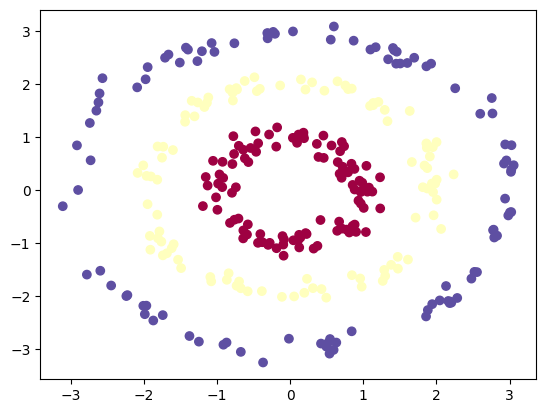

In [25]:
plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)

In [26]:
import torch
import torch.nn.functional as F

In [27]:
X = X.astype(np.float32)
Y = Y.astype(np.int64)

X = torch.from_numpy(X)
Y = torch.from_numpy(Y).long()
Y = torch.nn.functional.one_hot((Y.reshape(m,))).T.double()

In [28]:
W_1 = torch.rand((5, 2))
b_1 = torch.zeros((5, 1))

W_2 = torch.rand((2, 5))
b_2 = torch.zeros((2, 1))

W_3 = torch.rand((3, 2))
b_3 = torch.zeros((3, 1))

W_1.requires_grad = True
b_1.requires_grad = True
W_2.requires_grad = True
b_2.requires_grad = True
W_3.requires_grad = True
b_3.requires_grad = True

lr = 0.01

In [31]:
for i in range(10000):
  Z_1 = torch.matmul(W_1, X) + b_1
  A_1 = torch.tanh(Z_1)

  Z_2 = torch.matmul(W_2, A_1) + b_2
  A_2 = torch.tanh(Z_2)

  Z_3 = torch.matmul(W_3, A_2) + b_3

  loss = F.cross_entropy(Z_3.T, Y.T)

  if(i%1000==0):
        print(loss)

  W_1.grad = None
  b_1.grad = None
  W_2.grad = None
  b_2.grad = None
  W_3.grad = None
  b_3.grad = None

  loss.backward()

  W_1.data += -lr * W_1.grad
  b_1.data += -lr * b_1.grad
  W_2.data += -lr * W_2.grad
  b_2.data += -lr * b_2.grad
  W_3.data += -lr * W_3.grad
  b_3.data += -lr * b_3.grad

tensor(0.1094, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.1028, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0970, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0919, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0873, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0832, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0794, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0761, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0730, dtype=torch.float64, grad_fn=<DivBackward1>)
tensor(0.0701, dtype=torch.float64, grad_fn=<DivBackward1>)


In [32]:
def predict(X):
    #h = 0
    #return h >= 0.5

    Z_1 = torch.matmul(W_1, X) + b_1
    A_1 = torch.tanh(Z_1)

    Z_2 = torch.matmul(W_2, A_1) + b_2
    A_2 = torch.tanh(Z_2)

    Z_3 = torch.matmul(W_3, A_2) + b_3
    A_3 = torch.softmax(Z_3, axis=0)

    #Z_4 = torch.matmul(W_4, A_3) + b_4
    #A_4 = torch.sigmoid(Z_4)

    return torch.argmax(A_3, axis=0)

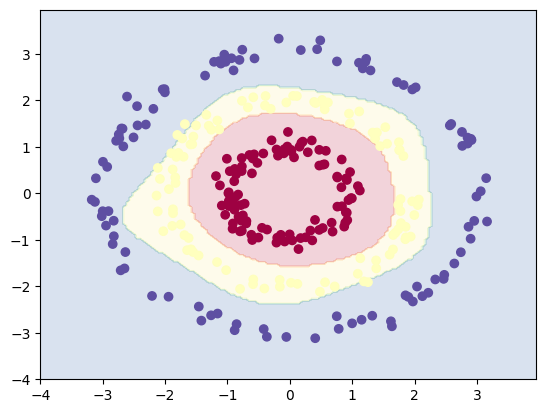

In [37]:
xx, yy = np.meshgrid(np.arange(-4, 4, 0.05), np.arange(-4, 4, 0.05))
X_disp = np.c_[xx.ravel(), yy.ravel()]

#h = _sigmoid(w_1*X_disp[:, 0] + w_2*X_disp[:, 1] + b) > 0.5
h = predict(torch.from_numpy(X_disp.T.astype(np.float32)))
h = h.reshape(xx.shape)

plt.contourf(xx, yy, h, cmap=plt.cm.Spectral, alpha=0.2)
plt.scatter(X[0, :], X[1, :], c=Y_classes[0, :], cmap=plt.cm.Spectral)

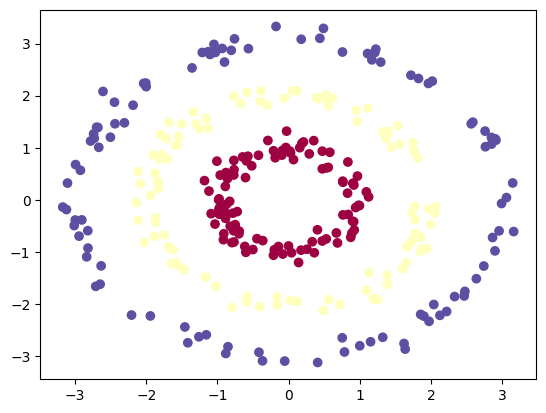

In [38]:
plt.scatter(X[0, :], X[1, :], c=Y_classes[0, :], cmap=plt.cm.Spectral)

In [41]:
Z_1 = torch.matmul(W_1, torch.tensor(X.astype(np.float32))) + b_1
A_1 = torch.tanh(Z_1)

Z_2 = torch.matmul(W_2, A_1) + b_2
A_2 = torch.tanh(Z_2)

Z_3 = torch.matmul(W_3, A_2) + b_3
A_3 = torch.softmax(Z_3, axis=0)

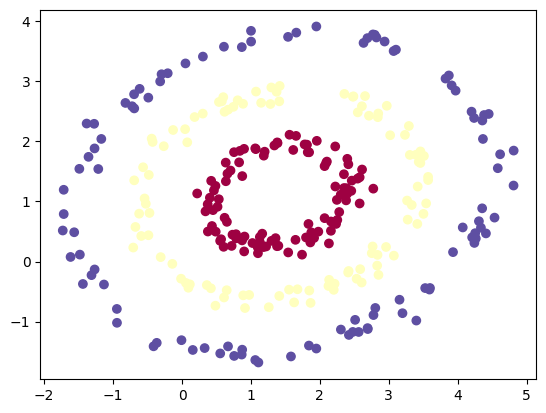

In [42]:
plt.scatter(Z_1[0, :].detach(), Z_1[1, :].detach(), c=Y_classes[0, :], cmap=plt.cm.Spectral)

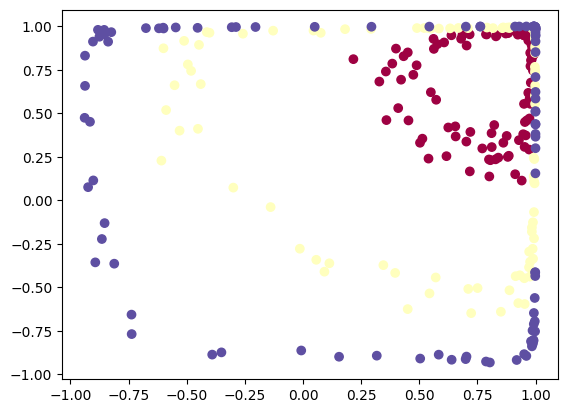

In [43]:
plt.scatter(A_1[0, :].detach(), A_1[1, :].detach(), c=Y_classes[0, :], cmap=plt.cm.Spectral)

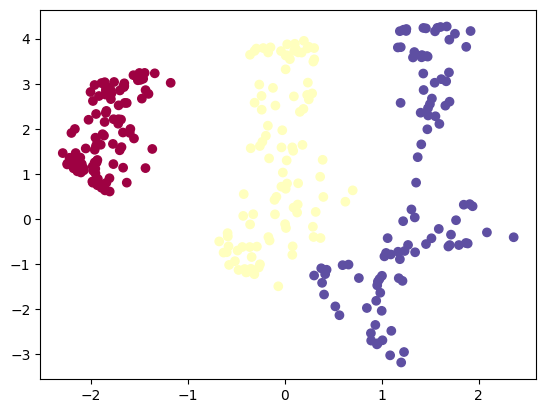

In [44]:
plt.scatter(Z_2[0, :].detach(), Z_2[1, :].detach(), c=Y_classes[0, :], cmap=plt.cm.Spectral)

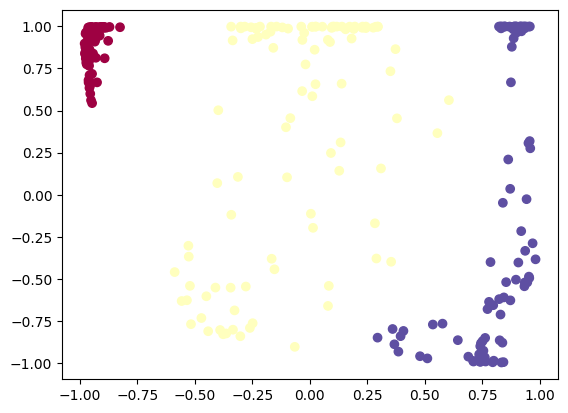

In [45]:
plt.scatter(A_2[0, :].detach(), A_2[1, :].detach(), c=Y_classes[0, :], cmap=plt.cm.Spectral)

In [46]:
W_1, b_1

(tensor([[ 0.0585,  1.0182],
         [ 0.8768,  0.0906],
         [ 0.5943,  0.5188],
         [-0.2373,  0.6742],
         [ 0.5823, -0.4356]], requires_grad=True),
 tensor([[ 1.4332],
         [ 1.1171],
         [-0.9447],
         [-1.0422],
         [-0.8500]], requires_grad=True))

In [47]:
W_2, b_2

(tensor([[-1.0982, -1.9079,  1.6088,  1.8810,  1.8190],
         [ 1.5636,  1.7786,  0.9351, -0.1073, -0.6905]], requires_grad=True),
 tensor([[ 3.8455],
         [-0.4006]], requires_grad=True))

In [48]:
W_3, b_3

(tensor([[-6.0017,  2.3003],
         [ 0.3171, -0.1486],
         [ 7.6424, -1.4331]], requires_grad=True),
 tensor([[-2.4461],
         [ 2.5438],
         [-0.0977]], requires_grad=True))